In [49]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv("/Users/hitteshkumarm/Downloads/mcdonalds.csv")

# Display column names
print(mcdonalds.columns)

# Display dimensions of the dataset
print(mcdonalds.shape)

# Display the first 3 rows
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [50]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv("/Users/hitteshkumarm/Downloads/mcdonalds.csv")

# Extract the first 11 columns
MD_x = mcdonalds.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
col_means = MD_x.mean()

# Round the means to 2 decimal places
col_means = col_means.round(2)

print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [41]:
from sklearn.decomposition import PCA

# Assuming that MD_x is your binary matrix as previously defined
pca = PCA()
pca.fit(MD_x)

# Get the summary of PCA
n_components = len(pca.explained_variance_ratio_)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Importance of components:")
for i in range(n_components):
    print(f"PC{i + 1} Standard deviation {pca.singular_values_[i]:.4f}")
    print(f"Proportion of Variance {explained_variance_ratio[i]:.4f}")
    print(f"Cumulative Proportion {cumulative_explained_variance[i]:.4f}")


Importance of components:
PC1 Standard deviation 28.8475
Proportion of Variance 0.2994
Cumulative Proportion 0.2994
PC2 Standard deviation 23.1472
Proportion of Variance 0.1928
Cumulative Proportion 0.4922
PC3 Standard deviation 19.2286
Proportion of Variance 0.1330
Cumulative Proportion 0.6253
PC4 Standard deviation 15.1963
Proportion of Variance 0.0831
Cumulative Proportion 0.7084
PC5 Standard deviation 12.8569
Proportion of Variance 0.0595
Cumulative Proportion 0.7679
PC6 Standard deviation 11.8231
Proportion of Variance 0.0503
Cumulative Proportion 0.8182
PC7 Standard deviation 11.0390
Proportion of Variance 0.0438
Cumulative Proportion 0.8620
PC8 Standard deviation 10.4836
Proportion of Variance 0.0395
Cumulative Proportion 0.9016
PC9 Standard deviation 10.1074
Proportion of Variance 0.0368
Cumulative Proportion 0.9383
PC10 Standard deviation 9.4821
Proportion of Variance 0.0324
Cumulative Proportion 0.9707
PC11 Standard deviation 9.0272
Proportion of Variance 0.0293
Cumulative Pr

In [42]:
# Assuming you have already performed PCA using scikit-learn
print("Standard deviations (1, .., p=11):")
print(pca.singular_values_)

print("\nRotation (n x k) = (11 x 11):")
print(pca.components_.T)


Standard deviations (1, .., p=11):
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]

Rotation (n x k) = (11 x 11):
[[-0.47693349  0.36378978 -0.30444402  0.0551622  -0.30753507  0.17073819
  -0.28051863  0.01304117  0.57240278 -0.11028437  0.04543901]
 [-0.15533159  0.016414   -0.0625153  -0.14242496  0.27760805 -0.34783006
  -0.05973793 -0.11307868 -0.01846534 -0.66581756 -0.54161635]
 [-0.00635636  0.01880869 -0.03701866  0.19761927  0.07062017 -0.3550866
   0.70763705  0.37593402  0.40027977 -0.07563413  0.14172992]
 [ 0.11623168 -0.03409395 -0.32235949 -0.35413876 -0.07340475 -0.40651542
  -0.38594277  0.58962241 -0.16051227 -0.00533813  0.25090987]
 [ 0.3044427  -0.06383884 -0.80237317  0.2539601   0.36139895  0.20934711
   0.03616962 -0.13824084 -0.00284738  0.00870725  0.00164229]
 [-0.10849325 -0.0869722  -0.06464172 -0.09736269  0.10793025 -0.59463206
  -0.08684577 -0.62779877  0.16619659  0.

In [54]:
from sklearn.decomposition import PCA

# Perform Principal Components Analysis
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display summary
explained_variance = MD_pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

for i in range(len(explained_variance)):
    print(f'PC{i + 1} - Explained Variance: {explained_variance[i]:.4f}, Cumulative Variance: {cumulative_explained_variance[i]:.4f}')

# Display factor loadings
print(pd.DataFrame(MD_pca.components_.T, columns=[f'PC{i + 1}' for i in range(len(explained_variance))], index=mcdonalds.columns[:11]))


PC1 - Explained Variance: 0.2994, Cumulative Variance: 0.2994
PC2 - Explained Variance: 0.1928, Cumulative Variance: 0.4922
PC3 - Explained Variance: 0.1330, Cumulative Variance: 0.6253
PC4 - Explained Variance: 0.0831, Cumulative Variance: 0.7084
PC5 - Explained Variance: 0.0595, Cumulative Variance: 0.7679
PC6 - Explained Variance: 0.0503, Cumulative Variance: 0.8182
PC7 - Explained Variance: 0.0438, Cumulative Variance: 0.8620
PC8 - Explained Variance: 0.0395, Cumulative Variance: 0.9016
PC9 - Explained Variance: 0.0368, Cumulative Variance: 0.9383
PC10 - Explained Variance: 0.0324, Cumulative Variance: 0.9707
PC11 - Explained Variance: 0.0293, Cumulative Variance: 1.0000
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232

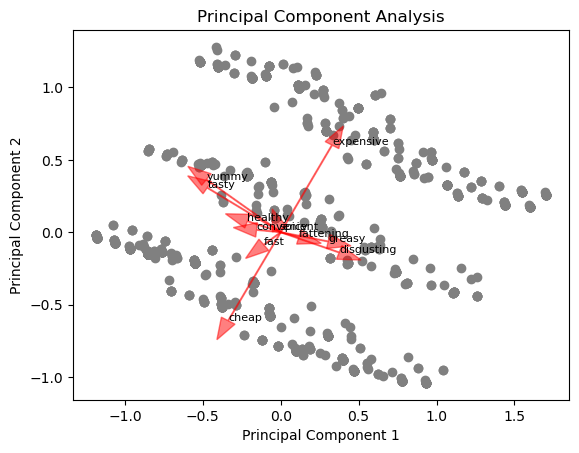

In [55]:
import matplotlib.pyplot as plt

# Assuming MD_pca is already computed in previous code

# Project data into principal component space
projected_data = MD_pca.transform(MD_x)

# Create a scatter plot of the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='grey')

# Add arrows for the original segmentation variables
for i, var in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i], color='red', alpha=0.5, width=0.005, head_width=0.1)

# Set labels for the arrows
for i, txt in enumerate(mcdonalds.columns[:11]):
    plt.annotate(txt, (MD_pca.components_[0, i], MD_pca.components_[1, i]), fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()
